In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf # linear regression (statsmodels)
from sklearn.model_selection import train_test_split  # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)


In [115]:
# specifying file name
file = "birthweight_low.xlsx"

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# reading the file into Python
birthweight = pd.read_excel ("birthweight_low.xlsx")

# outputting the first ten rows of the dataset
birthweight.head(n = 10)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956
5,67,11.0,4,8.0,40,8.0,4,9,16,14,0,1,0,0,1,0,0,1984
6,54,12.0,2,12.0,46,12.0,9,9,17,12,1,0,1,0,0,1,0,2050
7,71,14.0,4,7.0,51,11.0,9,8,15,13,0,1,0,0,1,0,0,2068
8,56,12.0,1,9.0,53,14.0,8,9,14,9,1,1,0,0,1,0,0,2148
9,58,12.0,2,12.0,61,16.0,9,9,13,6,0,0,1,0,0,1,0,2180


In [116]:
#Creating new columns with missing values
for col in birthweight:
    if birthweight[col].isnull().sum() > 0:
         birthweight['m_'+ col] = birthweight[col].isnull().astype(int)
            
birthweight['mv_sum'] = 0

for col in birthweight:
    if col[:2] == 'm_':
        birthweight['mv_sum'] = birthweight[col] + birthweight['mv_sum']      

print(f"""
Sums of Missing Value Flags
--------------------------
{birthweight.iloc[ : , -4:-1].sum(axis = 0)}

""")
    
# printing results
print(birthweight.columns)


Sums of Missing Value Flags
--------------------------
m_meduc    3
m_npvis    3
m_feduc    7
dtype: int64


Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'omaps', 'fmaps', 'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth', 'bwght', 'm_meduc', 'm_npvis', 'm_feduc', 'mv_sum'], dtype='object')


In [117]:
## Imputing Medians for Possible NaN
### Calculating the medians for each column
meduc_median        = birthweight['meduc']         .median()
npvis_median        = birthweight['npvis']         .median()
feduc_median        = birthweight['feduc']         .median()
drink_median        = birthweight['drink']         .median()
cigs_median         = birthweight['cigs']          .median()
monpre_median        = birthweight['monpre']         .median()
fage_median        = birthweight['fage']         .median()
omaps_median        = birthweight['omaps']         .median()
fmaps_median        = birthweight['fmaps']         .median()

### Imputing
birthweight['meduc']         .fillna(value = meduc_median,           inplace = True)
birthweight['npvis']         .fillna(value = npvis_median,           inplace = True)
birthweight['feduc']         .fillna(value = feduc_median,           inplace = True)
birthweight['cigs']         .fillna(value = cigs_median,           inplace = True)
birthweight['drink']         .fillna(value = drink_median,           inplace = True)
birthweight['monpre']         .fillna(value = monpre_median,           inplace = True)
birthweight['fage']         .fillna(value = fage_median,           inplace = True)
birthweight['omaps']         .fillna(value = omaps_median,           inplace = True)
birthweight['fmaps']         .fillna(value = fmaps_median,           inplace = True)

# Checking for Missing Values
print(birthweight.iloc[ : , : 18].isnull().any())


mage      False
meduc     False
monpre    False
npvis     False
fage      False
feduc     False
omaps     False
fmaps     False
cigs      False
drink     False
male      False
mwhte     False
mblck     False
moth      False
fwhte     False
fblck     False
foth      False
bwght     False
dtype: bool


In [118]:
# Making clear dataset without helping columns
## Dropping the "'m_'+col" columns
for col in birthweight:
    if 'm_' in col:
        birthweight.drop(col, inplace = True, axis = 1)

## Dropping the "missing_values_sum" column
birthweight.drop('mv_sum', inplace = True, axis = 1)
  
# Checking the result
birthweight.head(n = 5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,14.0,5,2.0,62,14.0,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956


In [119]:
#drop omaps and fmaps- since the vent occurs after birth.
birthweight.drop('omaps', inplace = True, axis = 1)
birthweight.drop('fmaps', inplace = True, axis = 1)
# Checking the result
birthweight.head(n = 5 )

,mage,meduc,monpre,npvis,fage,feduc,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,14.0,5,2.0,62,14.0,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,17,13,0,1,0,0,1,0,0,1956


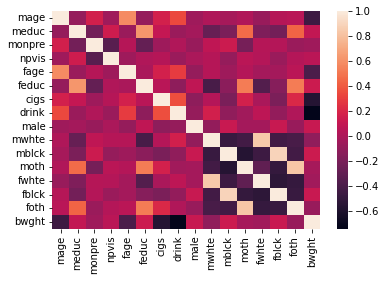

In [120]:
# linear (Pearson) correlation
birthweight_corr = birthweight.corr(method = 'pearson').round(decimals = 2)

# instantiating a heatmap
sns.heatmap(birthweight_corr)


# displaying the plot
plt.show()


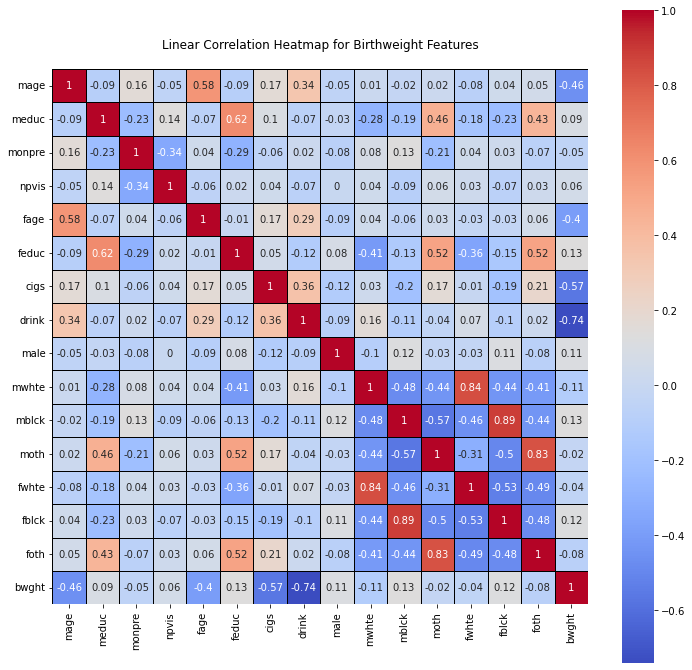

In [121]:
# specifying plot size (making it bigger)
fig, ax = plt.subplots(figsize=(12,12))


# developing a coolwarm heatmap
sns.heatmap(data       = birthweight_corr, # the correlation matrix
            cmap       = 'coolwarm',    # changing to MEDIUM colors
            square     = True,          # tightening the layout
            annot      = True,          # should there be numbers in the heatmap
            linecolor  = 'black',       # lines between boxes
            linewidths = 0.5)           # how thick should the lines be?


# title and displaying the plot
plt.title("""
Linear Correlation Heatmap for Birthweight Features
""")

plt.show()


In [122]:
# Categorizing the data
# 
# continuous_data = [ 'mage',
#                     'meduc',
#                     'monpre',
#                     'fage',
#                     'feduc',
#                     'bwght']

# INTERVAL/COUNT
# --------------
# Interval_data = ['npvis',
#                  'cigs',
#                  'drink',]
# 
#CATEGORICAL/OTHER
# -----------------
# categorical_data = ['male',
#                     'mwhte',
#                     'mblck',
#                     'moth',
#                     'fwhte',
#                     'fblck',
#                     'foth',]

In [123]:
# creating a list of continuous features (including bwght)
continuous_data = [ 'mage',
                    'meduc',
                    'monpre',
                    'fage',
                    'feduc',
                    'bwght']
# developing a correlation matrix based on continuous features
birthweightCont_corr = birthweight[continuous_data].corr(method = 'pearson')

# filtering the results to only show correlations with bwght
birthweightCont_corr.loc[ : , "bwght"].round(decimals = 2).sort_values(ascending = False)

bwght     1.00
feduc     0.13
meduc     0.09
monpre   -0.05
fage     -0.40
mage     -0.46
Name: bwght, dtype: float64

In [124]:
# creating a list of Interval Data features (including bwght)
interval_data = ['npvis',
                  'cigs',
                  'drink',
                  "bwght"]
# developing a correlation matrix based on continuous features
birthweightInt_corr = birthweight[interval_data].corr(method = 'pearson')

# filtering the results to only show correlations with bwght
birthweightInt_corr.loc[ : , "bwght"].round(decimals = 2).sort_values(ascending = False)

bwght    1.00
npvis    0.06
cigs    -0.57
drink   -0.74
Name: bwght, dtype: float64

Continous Variable- Feature Enginering

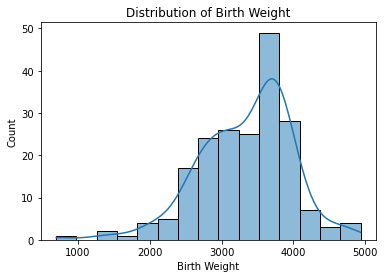

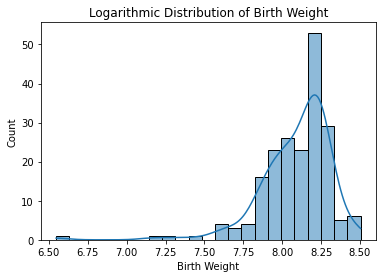

In [125]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'bwght',
          kde    = True)


# title and axis labels
plt.title(label   = "Distribution of Birth Weight")
plt.xlabel(xlabel = "Birth Weight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

# log transforming bwght and saving it to the dataset
birthweight['log_bwght'] = np.log(birthweight['bwght'])

# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'log_bwght',
          kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Birth Weight")
plt.xlabel(xlabel = "Birth Weight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

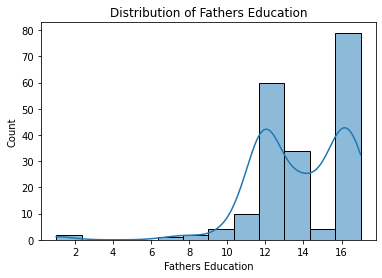

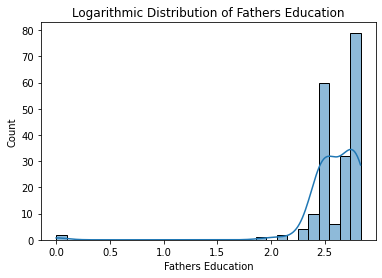

In [126]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'feduc',
          kde    = True)


# title and axis labels
plt.title(label   = "Distribution of Fathers Education")
plt.xlabel(xlabel = "Fathers Education") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

# log transforming bwght and saving it to the dataset
birthweight['log_feduc'] = np.log(birthweight['feduc'])

# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'log_feduc',
          kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Fathers Education")
plt.xlabel(xlabel = "Fathers Education") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

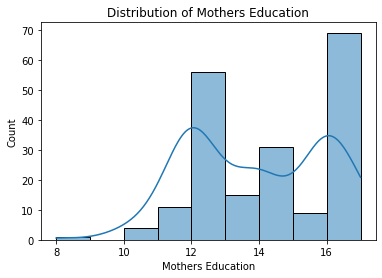

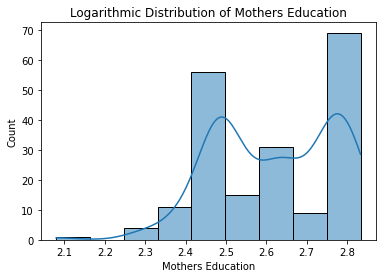

In [127]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'meduc',
          kde    = True)


# title and axis labels
plt.title(label   = "Distribution of Mothers Education")
plt.xlabel(xlabel = "Mothers Education") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

# log transforming bwght and saving it to the dataset
birthweight['log_meduc'] = np.log(birthweight['meduc'])

# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'log_meduc',
          kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Mothers Education")
plt.xlabel(xlabel = "Mothers Education") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

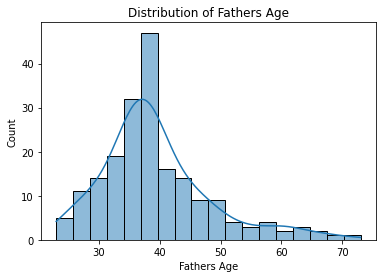

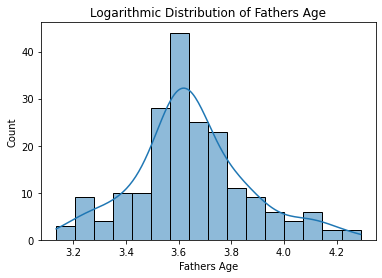

In [128]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'fage',
          kde    = True)


# title and axis labels
plt.title(label   = "Distribution of Fathers Age")
plt.xlabel(xlabel = "Fathers Age") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

# log transforming bwght and saving it to the dataset
birthweight['log_fage'] = np.log(birthweight['fage'])

# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'log_fage',
          kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Fathers Age")
plt.xlabel(xlabel = "Fathers Age") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

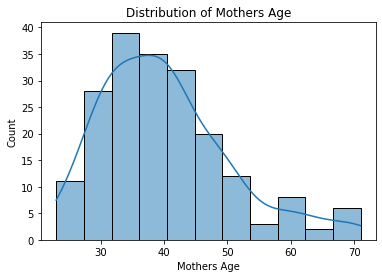

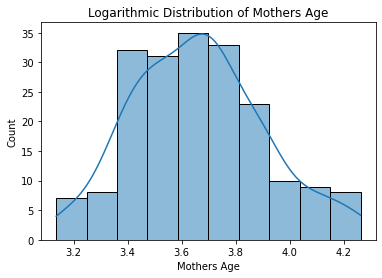

In [129]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'mage',
          kde    = True)


# title and axis labels
plt.title(label   = "Distribution of Mothers Age")
plt.xlabel(xlabel = "Mothers Age") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

# log transforming bwght and saving it to the dataset
birthweight['log_mage'] = np.log(birthweight['mage'])

# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'log_mage',
          kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Mothers Age")
plt.xlabel(xlabel = "Mothers Age") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

Text(0, 0.5, 'Birth Weight')

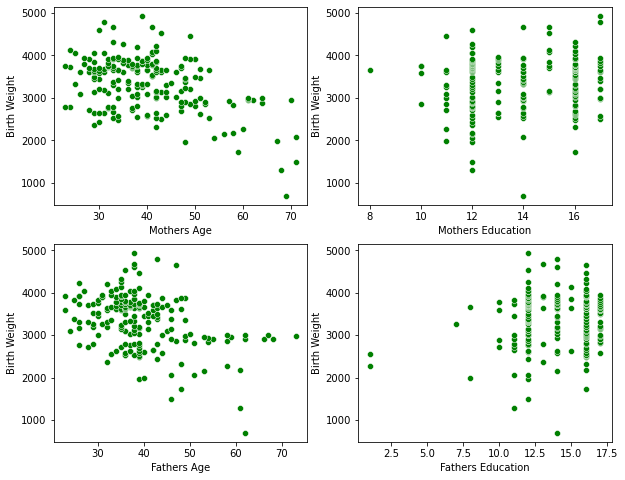

In [130]:
########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = birthweight['mage'],
                y = birthweight['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Mothers Age')
plt.ylabel(ylabel = 'Birth Weight')

########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = birthweight['meduc'],
                y = birthweight['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Mothers Education')
plt.ylabel(ylabel = 'Birth Weight')

########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = birthweight['fage'],
                y = birthweight['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Fathers Age')
plt.ylabel(ylabel = 'Birth Weight')

########################


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = birthweight['feduc'],
                y = birthweight['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Fathers Education')
plt.ylabel(ylabel = 'Birth Weight')



In [131]:
# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """bwght ~                                 
                                       mage +                                    
                                        moth +
                                        foth +
                                        cigs +
                                        drink + 
                                        fblck +
                                        mwhte +
                                        fwhte +
                                        mblck                         
                                        
""",
                  data = birthweight)
#  monpre 69.8 npvis + 70 feduc +70.1  fage 70.1  meduc +69.5

# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     64.57
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           1.12e-46
Time:                        08:53:36   Log-Likelihood:                -1426.0
No. Observations:                 196   AIC:                             2868.
Df Residuals:                     188   BIC:                             2894.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2970.7332     66.826     44.455      0.0

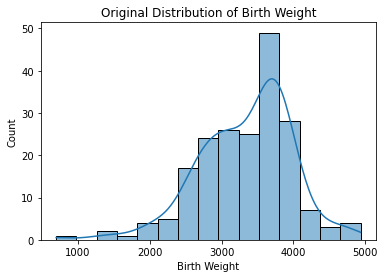

In [132]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'bwght',
          kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Birth Weight")
plt.xlabel(xlabel = "Birth Weight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

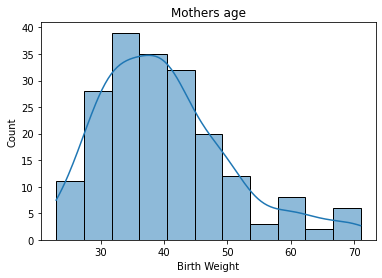

In [133]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'mage',
          kde    = True)


# title and axis labels
plt.title(label   = "Mothers age")
plt.xlabel(xlabel = "Birth Weight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

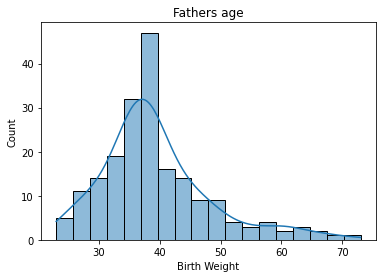

In [134]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'fage',
          kde    = True)


# title and axis labels
plt.title(label   = "Fathers age")
plt.xlabel(xlabel = "Birth Weight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

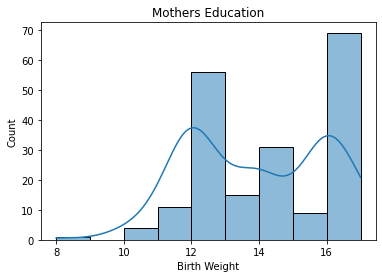

In [135]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'meduc',
          kde    = True)


# title and axis labels
plt.title(label   = "Mothers Education")
plt.xlabel(xlabel = "Birth Weight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

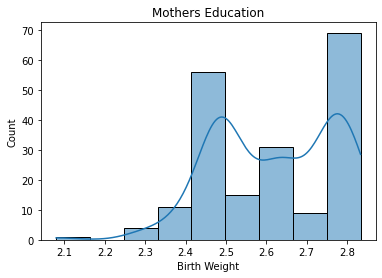

In [136]:
# log transforming Sale_Price and saving it to the dataset
birthweight['log_meduc'] = np.log(birthweight['meduc'])

# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'log_meduc',
          kde    = True)


# title and axis labels
plt.title(label   = "Mothers Education")
plt.xlabel(xlabel = "Birth Weight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

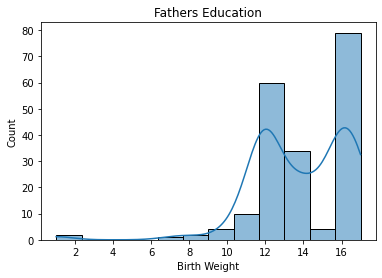

In [137]:

# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'feduc',
          kde    = True)


# title and axis labels
plt.title(label   = "Fathers Education")
plt.xlabel(xlabel = "Birth Weight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [138]:
# interacting variable- creating new columns

birthweight['fage_cigs'] = birthweight['fage'] * birthweight['cigs']
birthweight['mage_cigs'] = birthweight['mage'] * birthweight['cigs']
birthweight['fage_drink'] = birthweight['fage'] * birthweight['drink']
birthweight['mage_drink'] = birthweight['mage'] * birthweight['drink']
birthweight['cigs_drink'] = birthweight['cigs'] * birthweight['drink']
birthweight['fage_mage'] = birthweight['fage'] * birthweight['mage']
birthweight['feduc_meduc'] = birthweight['feduc'] * birthweight['meduc']

In [139]:
for column in birthweight:
    print(f"{column} +,")

mage +,
meduc +,
monpre +,
npvis +,
fage +,
feduc +,
cigs +,
drink +,
male +,
mwhte +,
mblck +,
moth +,
fwhte +,
fblck +,
foth +,
bwght +,
log_bwght +,
log_feduc +,
log_meduc +,
log_fage +,
log_mage +,
fage_cigs +,
mage_cigs +,
fage_drink +,
mage_drink +,
cigs_drink +,
fage_mage +,
feduc_meduc +,


In [140]:
# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """bwght ~  mage+
                                        fage +
                                        drink+
                                        mage_cigs+  
                                        cigs_drink
                               

                                        """,
                  data = birthweight)
#                                        fage_mage 

# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     96.44
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           3.21e-50
Time:                        08:53:38   Log-Likelihood:                -1422.3
No. Observations:                 196   AIC:                             2857.
Df Residuals:                     190   BIC:                             2876.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4592.0267    123.422     37.206      0.0

In [141]:
# preparing explanatory variable data
birthweight_data   = birthweight.drop(["bwght",
                                         "log_bwght",
                                         "meduc", 
                                         "monpre", 
                                         "npvis",
                                         "feduc",
                                         "cigs",
                                         "male",
                                         "mwhte",
                                         "mblck",
                                         "foth",
                                         "moth",
                                         "fwhte", 
                                         "fblck", 
                                         "log_bwght", 
                                         "log_feduc", 
                                         "log_meduc", 
                                         "log_fage", 
                                         "log_mage", 
                                         "fage_cigs", 
                                         "fage_drink", 
                                         "mage_drink", 
                                         "feduc_meduc"
                                      ],
                               axis = 1)

#" fage_mage"drink+
                                        #mage_cigs+
# preparing response variables
birthweight_target = birthweight.loc[ : , "bwght"]
log_birthweight_target = birthweight.loc[ : , "log_bwght"]


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            birthweight_data,
            birthweight_target,
            test_size = 0.25,
            random_state = 219)
#taking the houring data and dividing it into X & Y sets, same for 

# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (147, 6)
y-side: (147,)


Testing Data
------------
X-side: (49, 6)
y-side: (49,)



In [142]:
# declaring set of x-variables
x_variables = ['mage',
                'fage',
                'drink',
                'mage_cigs',
                'cigs_drink']

#'fage_mage
# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

mage +
fage +
drink +
mage_cigs +
cigs_drink +


In [143]:
# merging X_train and y_train so that they can be used in statsmodels
birthweight_train = pd.concat([x_train, y_train], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula =  """bwght ~ mage +
                                        fage  +
                                        drink  +
                                        mage_cigs  +
                                        cigs_drink  
                                        """,
                                data = birthweight_train)

#fage_mage  
# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     75.91
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           2.92e-38
Time:                        08:53:38   Log-Likelihood:                -1068.7
No. Observations:                 147   AIC:                             2149.
Df Residuals:                     141   BIC:                             2167.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4689.3791    144.999     32.341      0.0

In [144]:
# applying model in scikit-learn

# Preparing a DataFrame based the the analysis above
ols_data1   = birthweight.loc[ : , x_variables]


# Preparing the target variable
birthweight_target = birthweight.loc[ : , 'bwght']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            birthweight_data,     # x-variables
            birthweight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data1,         # x-variables
            birthweight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


Devloping OSL model

In [145]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)
#(lr_predict- here is the X_test tell me Y value for it)

# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square
#now it compares the data with y data

#Saving LR score
lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4) # taking training data and calculate the r ^2
lr_test_score = lr.score(x_test_OLS, y_test_OLS).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)


#OLS Train-Test Gap -There is a little bit of instability depending upon unpredicted error. <0.05 is acceptable

# assignment- dont go above 0.06

OLS Training Score : 0.7291
OLS Testing Score  : 0.6386
OLS Train-Test Gap : 0.0905


In [146]:
# zipping each feature name to its coefficient
lr_model_values = zip(birthweight_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 4689.38)
('mage', -8.12)
('fage', -4.52)
('drink', -74.21)
('mage_cigs', -0.53)
('cigs_drink', -2.89)


Devloping Lasso model

In [147]:
import sklearn.linear_model
#we should use full datasets
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude
# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

#lassso precalcualtes and make adjustments so that the model is not over or under fitting.

# take variable that are fresater than 0 and put them in OLS and check.

Lasso Training Score : 0.7323
Lasso Testing Score  : 0.6526
Lasso Train-Test Gap : 0.0797


C:\Users\kruta\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [148]:
# zipping each feature name to its coefficient
lasso_model_values = zip(birthweight_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)
    
#its ok to put M_ colums as well
#lasso cannot account for some mistake - eg the below model has lot area & log Lot area which we know is ok with the model.


('intercept', 4405.97)
('mage', -0.62)
('fage', 0.0)
('drink', -69.06)
('mage_cigs', -0.5)
('cigs_drink', -3.02)
('fage_mage', -0.14)


In [149]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 4405.97)
('mage', -0.62)
('drink', -69.06)
('mage_cigs', -0.5)
('cigs_drink', -3.02)
('fage_mage', -0.14)


Develop an ARD model.

In [150]:
# INSTANTIATING a model object
from sklearn.linear_model import ARDRegression
ard_model = ARDRegression()


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL,y_train_FULL)


# PREDICTING on new data
ard_pred = ard_model.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL,y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL,y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL,y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL,y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.7327
Testing Score : 0.6537
ARD Train-Test Gap : 0.079


In [151]:
# zipping each feature name to its coefficient
ard_model_values = zip(birthweight_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 4415.91)
('mage', -0.00096)
('fage', 0.00134)
('drink', -72.51914)
('mage_cigs', -0.52792)
('cigs_drink', -2.89302)
('fage_mage', -0.14877)


In [152]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 4415.91)
('mage', -0.00096)
('fage', 0.00134)
('drink', -72.51914)
('mage_cigs', -0.52792)
('cigs_drink', -2.89302)
('fage_mage', -0.14877)


In [153]:
# comparing results

print(f"""
Model      Train Score      Test Score      Score Gap   
-----      -----------      ----------      ----------
 OLS        {lr_train_score}           {lr_test_score}           {lr_test_gap}
 Lasso      {lasso_train_score}           {lasso_test_score}           {lasso_test_gap}
*ARD        {ard_train_score}           {ard_test_score}           {ard_test_gap}
""")
#None of the model are have a test gap < 0.05. 
#Therefore will need to work on this model. But ARD model has the least gap as compared to others .So will choose that.


Model      Train Score      Test Score      Score Gap   
-----      -----------      ----------      ----------
 OLS        0.7291           0.6386           0.0905
 Lasso      0.7323           0.6526           0.0797
*ARD        0.7327           0.6537           0.079

